In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import  Dense, Dropout
from keras.optimizers import Adam
from keras.layers import Input, Dense
from keras.models import load_model
from keras.preprocessing import image
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input

2024-03-15 01:14:27.121756: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-15 01:14:27.373469: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 01:14:27.373644: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 01:14:27.406719: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-15 01:14:27.499242: I tensorflow/core/platform/cpu_feature_guar

In [2]:
InputPath = []
label = []
sourceFileDir = os.path.dirname(os.path.abspath("__file__"))
print(sourceFileDir)
i = 0
Animals = {}
for Class in os.listdir(os.path.join(sourceFileDir,"Animals")):
    print(Class)
    for path in os.listdir(os.path.join(sourceFileDir,"Animals",Class)):
        label.append(i)
        InputPath.append(os.path.join("Animals", Class, path))
    Animals.update({i:Class})
    i+=1
print(label)



/home/abdulrahman/Projects/VGG16
butterfly
elephant
cow
horse
sheep
chicken
cat
squirrel
dog
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [3]:
df = pd.DataFrame()
df['images'] = InputPath
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,Animals/elephant/OIP-jOynit10Wykz6Ct71iKKbwHaL...,1
1,Animals/dog/OIP-t1wUS9twi5umHrZI-WeNkgHaFi.jpeg,8
2,Animals/dog/OIP-qh6EAfSIxPoOYDQVPNKfwgHaHa.jpeg,8
3,Animals/sheep/OIP-jIkReVxQGcz829-VYxXFMgHaE6.jpeg,4
4,Animals/butterfly/ea36b60b2bf4083ed1584d05fb1d...,0


<Axes: xlabel='label', ylabel='count'>

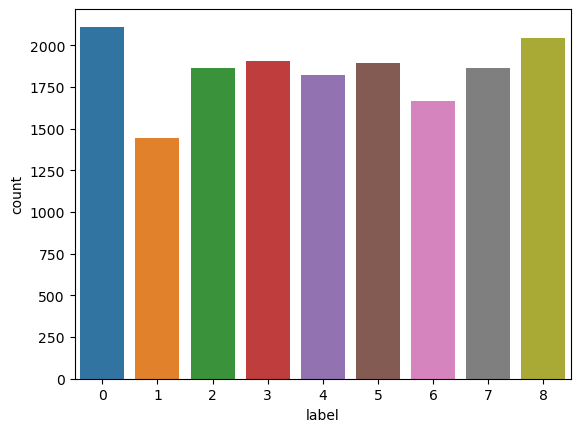

In [4]:
import seaborn as sns
sns.countplot(data=df,x='label')

In [5]:
df["label"]

0        1
1        8
2        8
3        4
4        0
        ..
16610    8
16611    4
16612    5
16613    8
16614    0
Name: label, Length: 16615, dtype: int64

In [6]:
df['label'] = df['label'].astype('str')

In [7]:
train, test = train_test_split(df, test_size=0.3, random_state=1)


In [8]:
TrainGenerator = ImageDataGenerator(dtype = 'float32',
    preprocessing_function=preprocess_input,
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip=True,
    fill_mode = 'nearest'
)
ValGenerator = ImageDataGenerator(dtype = 'float32',
        preprocessing_function=preprocess_input,
        rescale = 1./255)

TrainIterator = TrainGenerator.flow_from_dataframe(
    df, 
    x_col='images', 
    y_col='label', 
    target_size=(256,256), 
    batch_size=8, 
    class_mode='categorical'
)
ValIterator = ValGenerator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(256,256), 
    batch_size=8, 
    class_mode='categorical'
)

Found 16615 validated image filenames belonging to 9 classes.
Found 4985 validated image filenames belonging to 9 classes.


In [12]:
model = Sequential()

model.add(ResNet50(
    include_top = False,
    pooling='avg',
    weights='imagenet',
))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9,activation='softmax'))
model.layers
model.layers[0].layers
model.layers[0].trainable = True
model.summary()

2024-03-15 01:14:32.891145: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-15 01:14:33.271759: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-15 01:14:33.271894: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-15 01:14:33.289725: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-15 01:14:33.289867: I external/local_xla/xla/stream_executor

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 24641417 (94.00 MB)
Trainable params: 24588297 (93.80 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [13]:
model.compile(optimizer=Adam(learning_rate=0.0005)
              , loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 9)                 4617      
                                                                 


Total params: 24641417 (94.00 MB)
Trainable params: 24588297 (93.80 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [14]:
history = model.fit(TrainIterator, epochs=40, validation_data=ValIterator)


Epoch 1/40


2024-03-15 01:15:01.217518: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-15 01:15:01.857113: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-15 01:15:03.506328: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-15 01:15:08.671716: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f791eb4f040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-15 01:15:08.671806: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-03-15 01:15:08.710281: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1710458108.924195  141447 de

 945/2077 [============>.................] - ETA: 2:50 - loss: 1.5509 - accuracy: 0.4754

2024-03-15 01:18:04.662604: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 592.88MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-15 01:18:04.745562: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 592.88MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-15 01:18:07.765490: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 573.44MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-15 01:18:07.827977: W external/local_tsl/tsl/framewor

2077/2077 [==============================] - 415s 171ms/step - loss: 1.3538 - accuracy: 0.5471 - val_loss: 1.2711 - val_accuracy: 0.6281
Epoch 2/40
2077/2077 [==============================] - 344s 166ms/step - loss: 0.9672 - accuracy: 0.6746 - val_loss: 0.9707 - val_accuracy: 0.6863
Epoch 3/40
2077/2077 [==============================] - 345s 166ms/step - loss: 0.8490 - accuracy: 0.7201 - val_loss: 1.0019 - val_accuracy: 0.7143
Epoch 4/40
2077/2077 [==============================] - 353s 170ms/step - loss: 0.7866 - accuracy: 0.7407 - val_loss: 0.7515 - val_accuracy: 0.7555
Epoch 5/40
2077/2077 [==============================] - 346s 167ms/step - loss: 0.7016 - accuracy: 0.7689 - val_loss: 0.5976 - val_accuracy: 0.8104
Epoch 6/40
2077/2077 [==============================] - 336s 162ms/step - loss: 0.6722 - accuracy: 0.7795 - val_loss: 0.6518 - val_accuracy: 0.7880
Epoch 7/40
2077/2077 [==============================] - 342s 165ms/step - loss: 0.6215 - accuracy: 0.7957 - val_loss: 0.673

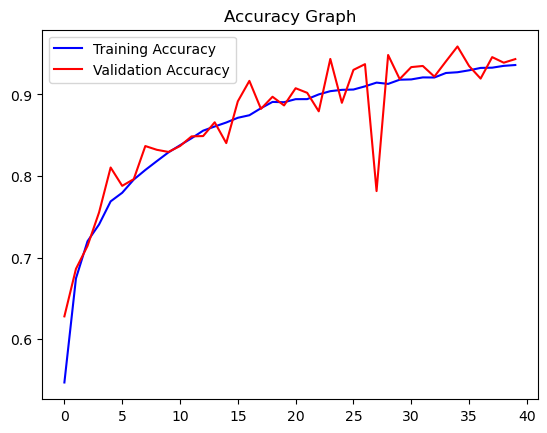

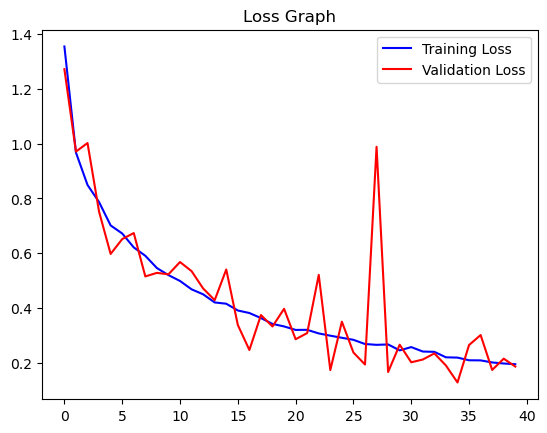

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [16]:
model.save("Animals77.h5")
model.save("Animals77.keras")
from keras.models import load_model

#model = load_model('Animals11.h5')
model.summary() 

/home/abdulrahman/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 24641417 (94.00 MB)
Trainable params: 24588297 (93.80 MB)
Non-trainable params: 53120 (207.50 KB)
_________________________________________________________________


In [31]:
image_path = "e.jpg" # path of the image
img = load_img(image_path, target_size=(256, 256))
img = np.array(img)
img = img / 255.0 # normalize the image
img = img.reshape(1, 256, 256, 3) # reshape for prediction
pred = model.predict(img)
print(pred[0])

1/1 [==============================] - 0s 44ms/step
[8.4308636e-11 9.9997151e-01 1.2999182e-06 2.4229097e-05 2.9622749e-06
 2.5999811e-10 1.3386219e-09 3.3377717e-11 4.8050513e-08]


In [32]:
print(Animals[np.argmax(pred[0])])

elephant
